# 1) Solving the travelling salesman problem (TSP) for 7 cities

### Number of cities

In [1]:
n = 7

n =  7


### Distance between cities

In [2]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

d = distanceMatrixCities(n)

d =

    0.00000   93.86159   98.86966   55.68936   78.39832   22.45300   86.26204
   24.65572    0.00000    6.21891   43.83687   56.25448   75.81690   21.50750
    7.65418   48.54821    0.00000   69.98364   55.89332   77.04183   46.32684
   74.70284    5.01043   22.77113    0.00000   27.55453   43.90099   68.09952
   18.68610    6.11726   17.45049   50.33226    0.00000   23.55954   90.02563
   90.62741   91.56467   47.18774   34.94656   32.65972    0.00000   38.97996
    7.00585   26.94670   82.37768   91.04334   69.73288    1.89047    0.00000



## a) Initial population

### Population

In [3]:
pop = perms([1:n]);

In [4]:
size(pop)(1)

ans =  5040


In [5]:
totalPop = pop;

### Size of the initial generation

In [6]:
sizeSubPop = 10 

sizeSubPop =  10


### Select individuals randomly from the population ("generation 0")

In [1]:
function subPop = createSubPopulation(totalPop,sizeSubPop)

    subPop = totalPop(randi(size(totalPop)(1),sizeSubPop,1),:);

end

generation0 = createSubPopulation(totalPop,sizeSubPop)


error: 'totalPop' undefined near line 1 column 35


## b) Fitness calculation

### Total travel distance for each possible sequence of cities

In [8]:
function individuals = distanceCalculation(pop,d)
    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end



In [9]:
## The first position of the array has the sequence of cities and the second position the total distance between cities
generation0 = distanceCalculation(pop = generation0,d = d)

generation0 =
{
  [1,1] =

     1   6   5   7   3   4   2
     6   3   1   7   5   2   4
     5   1   2   7   3   4   6
     6   2   4   1   7   3   5
     4   1   2   7   5   6   3
     7   4   6   5   3   2   1
     7   3   4   5   6   1   2
     5   3   4   6   7   1   2
     1   2   4   6   3   7   5
     7   5   3   6   1   4   2

  [1,2] =

     302.51
     260.79
     330.32
     434.64
     330.55
     258.26
     387.96
     271.18
     344.85
     315.55

}



### Fitness function

In [10]:
function individuals = fitness(individuals)

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [11]:
#The third position of the array includes the fitness of each individual
generation0 = fitness(generation0)

generation0 =
{
  [1,1] =

     1   6   5   7   3   4   2
     6   3   1   7   5   2   4
     5   1   2   7   3   4   6
     6   2   4   1   7   3   5
     4   1   2   7   5   6   3
     7   4   6   5   3   2   1
     7   3   4   5   6   1   2
     5   3   4   6   7   1   2
     1   2   4   6   3   7   5
     7   5   3   6   1   4   2

  [1,2] =

     302.51
     260.79
     330.32
     434.64
     330.55
     258.26
     387.96
     271.18
     344.85
     315.55

  [1,3] =

     0.0033057
     0.0038345
     0.0030274
     0.0023008
     0.0030252
     0.0038721
     0.0025776
     0.0036876
     0.0028998
     0.0031690

}



## c) Choosing parents to create the next generation of individuals

In [12]:
function [individuals,parents] = chooseParents(individuals)

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [13]:
#The fourth position of the array shows which individuals were selected as parents
chooseParents(generation0)

ans =
{
  [1,1] =

     1   6   5   7   3   4   2
     6   3   1   7   5   2   4
     5   1   2   7   3   4   6
     6   2   4   1   7   3   5
     4   1   2   7   5   6   3
     7   4   6   5   3   2   1
     7   3   4   5   6   1   2
     5   3   4   6   7   1   2
     1   2   4   6   3   7   5
     7   5   3   6   1   4   2

  [1,2] =

     302.51
     260.79
     330.32
     434.64
     330.55
     258.26
     387.96
     271.18
     344.85
     315.55

  [1,3] =

     0.0033057
     0.0038345
     0.0030274
     0.0023008
     0.0030252
     0.0038721
     0.0025776
     0.0036876
     0.0028998
     0.0031690

  [1,4] =

     0
     1
     0
     0
     0
     1
     0
     0
     0
     0

}



In [14]:
function parents = createParents(individuals)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [15]:
#This array includes information on the parents selected from generation 0 (1: sequence of cities, 2: total distance, 3: fitness)
parentsG0 = createParents(generation0)

parentsG0 =
{
  [1,1] =

     6   3   1   7   5   2   4
     7   4   6   5   3   2   1

  [1,2] =

     260.79
     258.26

  [1,3] =

     0.0038345
     0.0038721

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [16]:
function geneExist = containGene(child,gene)

    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [17]:
function child = crossover(parents)


    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
end

In [18]:
childG0 = crossover(parentsG0)

childG0 =

   6   7   5   4   3   2   1



## e) Mutation

In [19]:
function child = mutation(child, pm)
    
    childCopy = child;
    chromosomeSize = length(child);

    %Select two random mutation points
    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    %Mutation is done with a 'pm'% chance
    mutationProbThreshold = rand(1);
    
    if mutationProbThreshold <= pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;

end

In [20]:
childG0
childG0 = mutation(childG0, pm = 0.5) # Mutation with a 50% probability

childG0 =

   6   7   5   4   3   2   1

childG0 =

   2   7   5   4   3   6   1



## f) Next Generation  (replacement)

### Size of the next generation 

In [21]:
sizeGeneration = 1*size(generation0{1})(1)

sizeGeneration =  10


### Check if the child exists in a generation

In [22]:
function childExist = containChild(child,children)
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

### Function to create the next generations of individuals

In [23]:
function generations = createNewGeneration(nGenerations,sizeGeneration,individuals,d,pm)
    
    
    #This process is iteratively repeated for each generation
    generations = {:};
    
    t=cputime;
    
    for i=1:nGenerations      
        
        
        
        individuals = distanceCalculation(individuals{1},d);

        individuals = fitness(individuals);

        parents = createParents(individuals);

        child = crossover(parents);

        child = mutation(child,pm);
        
        if i == 1
            
            #Information about the new generation
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
            
        end
               
        if i > 1
        
            #This process is repeated until reaching the number of individuals in a generation
            newGeneration = {:};
        
            %newGeneration{2} = zeros(sizeGeneration,length(child));

            newGeneration{1}(1,:) = child;

            for j=1:sizeGeneration

                 newChild = mutation(crossover(parents),pm);

                 #Children are all different
                 while(containChild(child = newChild, children = newGeneration{1}))

                     newChild = mutation(crossover(parents),pm);

                 end

                 newGeneration{1}(j,:) = newChild;

            end

            #Information about the new generation
            individuals  = distanceCalculation(newGeneration{1},d);
            individuals = fitness(individuals);
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
        
        end
        

        


        
    end

end

# 2) Analyses

## Initial generation

In [24]:
createNewGeneration(nGenerations = 1, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2)

ans =
{
  [1,1] =
  {
    [1,1] =

       1   6   5   7   3   4   2
       6   3   1   7   5   2   4
       5   1   2   7   3   4   6
       6   2   4   1   7   3   5
       4   1   2   7   5   6   3
       7   4   6   5   3   2   1
       7   3   4   5   6   1   2
       5   3   4   6   7   1   2
       1   2   4   6   3   7   5
       7   5   3   6   1   4   2

    [1,2] =

       302.51
       260.79
       330.32
       434.64
       330.55
       258.26
       387.96
       271.18
       344.85
       315.55

    [1,3] =

       0.0033057
       0.0038345
       0.0030274
       0.0023008
       0.0030252
       0.0038721
       0.0025776
       0.0036876
       0.0028998
       0.0031690

    [1,4] =  258.26
    [1,5] =  0.0084960
  }

}



## First generation

In [25]:
generation01 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2);

In [26]:
generation01{2}

ans =
{
  [1,1] =

     6   7   5   4   3   2   1
     6   3   7   5   4   2   1
     6   7   4   5   3   2   1
     7   6   5   3   2   1   4
     6   3   7   5   2   4   1
     7   4   2   5   3   6   1
     7   4   6   5   3   2   1
     7   6   3   1   5   2   4
     6   3   1   7   5   2   4
     7   6   5   2   1   3   4

  [1,2] =

     255.02
     243.25
     248.23
     180.89
     287.90
     337.43
     258.26
     185.08
     260.79
     234.18

  [1,3] =

     0.0039213
     0.0041111
     0.0040285
     0.0055281
     0.0034734
     0.0029636
     0.0038721
     0.0054029
     0.0038345
     0.0042703

  [1,4] =  180.89
  [1,5] =  0.081403
}



## Second generation

In [27]:
generation12 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation01{2}, d = d, pm = 0.8);

In [28]:
generation12{2}

ans =
{
  [1,1] =

     7   5   3   6   2   1   4
     7   6   2   1   5   3   4
     7   6   3   1   5   2   4
     1   6   5   3   2   7   4
     7   6   5   3   1   2   4
     5   6   3   7   2   1   4
     7   4   3   5   2   1   6
     7   3   5   6   2   1   4
     7   6   3   1   2   5   4
     7   4   3   1   5   2   6

  [1,2] =

     336.13
     283.94
     185.08
     233.66
     197.35
     224.37
     222.93
     333.74
     257.18
     281.80

  [1,3] =

     0.0029750
     0.0035218
     0.0054029
     0.0042797
     0.0050671
     0.0044570
     0.0044856
     0.0029963
     0.0038883
     0.0035486

  [1,4] =  185.08
  [1,5] =  0.079272
}



## 4 generations (generation 0, 1, 2 and 3)

In [29]:
generations1234 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.8);
generations1234

generations1234 =
{
  [1,1] =
  {
    [1,1] =

       1   6   5   7   3   4   2
       6   3   1   7   5   2   4
       5   1   2   7   3   4   6
       6   2   4   1   7   3   5
       4   1   2   7   5   6   3
       7   4   6   5   3   2   1
       7   3   4   5   6   1   2
       5   3   4   6   7   1   2
       1   2   4   6   3   7   5
       7   5   3   6   1   4   2

    [1,2] =

       302.51
       260.79
       330.32
       434.64
       330.55
       258.26
       387.96
       271.18
       344.85
       315.55

    [1,3] =

       0.0033057
       0.0038345
       0.0030274
       0.0023008
       0.0030252
       0.0038721
       0.0025776
       0.0036876
       0.0028998
       0.0031690

    [1,4] =  258.26
    [1,5] =  0.0067600
  }

  [1,2] =
  {
    [1,1] =

       7   4   6   2   3   5   1
       5   3   7   6   2   4   1
       3   7   5   4   6   2   1
       6   3   7   1   2   4   5
       6   2   7   5   4   3   1
       4   3   1   7   5   2   6
       6   

# 3) Computational time, generations and optimality

#### Optimal value

In [30]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [31]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  84.382
cputime =  1.0892


#### Plot computational time and optimality

In [32]:
function OptimalityAndGenerations = tableOptimalityAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)

    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);

    OptimalityAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        OptimalityAndGenerations(count,1) = i;
        OptimalityAndGenerations(count,2) = newGenerations{i}{4};
        count++;

    end

end

In [33]:
OptimalityAndGenerations18 = tableOptimalityAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = individuals, d = d, pm = 0.5)

OptimalityAndGenerations18 =

     1.0000   258.2585
     2.0000   180.8940
     3.0000   110.2299
     4.0000   110.2299
     5.0000   110.2299
     6.0000   103.7660
     7.0000   103.7660
     8.0000   103.7660



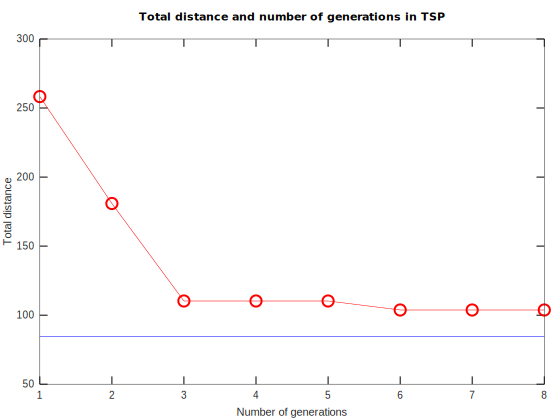

In [34]:
plot([OptimalityAndGenerations18(:,1)], [OptimalityAndGenerations18(:,2)], 'o-r');
title ("Total distance and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Total distance");
hold on;
plot([min(OptimalityAndGenerations18(:,1)),max(OptimalityAndGenerations18(:,1))],[optimalDistance,optimalDistance], 'b')
hold off;

#### Plot computational time and number of generations

In [35]:
function CPUTimeAndGenerations = tableCPUTimeAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)
    
    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);
    
    CPUTimeAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        CPUTimeAndGenerations(count,1) = i;
        CPUTimeAndGenerations(count,2) = newGenerations{i}{5};
        count++;

    end

end

In [36]:
CPUTimeAndGenerations18 = tableCPUTimeAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = individuals, d = d, pm = 0.5)

CPUTimeAndGenerations18 =

   1.0000000   0.0067420
   2.0000000   0.0965480
   3.0000000   0.1782830
   4.0000000   0.3360340
   5.0000000   0.4634520
   6.0000000   0.5985360
   7.0000000   0.7547450
   8.0000000   0.8733950



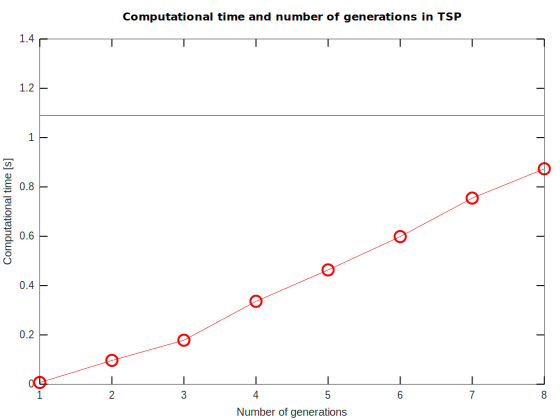

In [37]:
plot([CPUTimeAndGenerations18(:,1)], [CPUTimeAndGenerations18(:,2)], 'o-r');
title ("Computational time and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Computational time [s]");
hold on;
plot([min(CPUTimeAndGenerations18(:,1)),max(CPUTimeAndGenerations18(:,1))],[cputime,cputime], 'b')
hold off;